---
title: Probability Distribution Notes
author: Jonathan Sarker
format:
  html:
    code-fold: true
---

# Probability Distribution Notes

## Distribution Links:

- [Bernoulli](#bernouilli)
- [Beta](#beta)

- [Cauchy](#cauchy)

- [Chi Squared](#chi2)
- [Exponential](#exponential)
- [Gamma](#gamma)
- [Lognormal](#lognormal)
- [Multinomial](#multinomial)
- [Normal](#normal)
- [Pareto](#pareto)
- [Poisson](#poisson)
- [t-distribution](#t)
- [Uniform](#uniform)


## Means and Variances Table
- [Table](#bottom)


In [2]:
import numpy as np
import pandas as pd
import random as rnd
import math
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns 
sns.set()

In [3]:
def plot1(x,f):
    """Convenient plotting of discrete distributions
    x : x-axis values
    f : scipy.stats pmf or pdf with parameters""" 
    plt.xlabel('x')
    plt.ylabel('P(x)')
    plt.vlines(x,0,f, lw=4, color='b')
    plt.show()

def plot2(x, f, labels=[]):
    """Convenient plotting of continuous distributions with varying parameters
    x : x-axis values
    f : list of scipy.stats pmf or pdf with parameters
    labels: parameter annotations""" 
    plt.xlabel('x')
    plt.ylabel('P(x)')
    for i,label in zip(f,labels):
        plt.plot(x,i, label=label)
    plt.legend()
    plt.show()

## Discrete Distributions:

### Discrete Uniform Distribution

For $k \ge 1$ as a given integer, $X$ is uniformly distributed on $\{1, ..., k\}$ if:

$$\begin{equation}
    f(x) = \begin{cases}
               1/k               & \text{for }  x = 1, ..., k\\
                0              & \text{otherwise}
           \end{cases}
\end{equation}$$

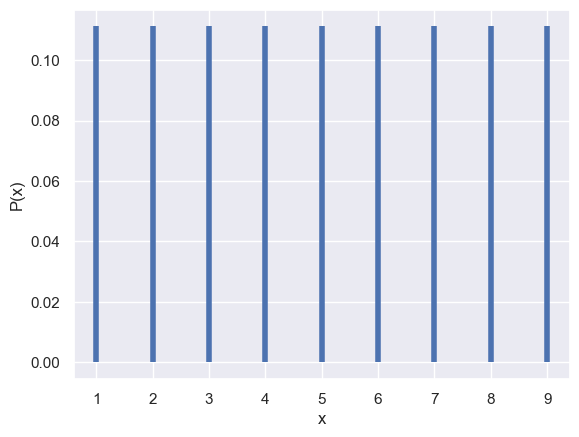

In [4]:
k = 10
low, high = 1, k
x = np.arange(1,k)
f = randint.pmf(x,low,high)
plot1(x,f)

<a id='bernoulli'></a>

### Bernoulli Distribution

Let $X$ represent an all or nothing event. Then $P(X=1) = 
p$ and $P(X=0) = 1-p$ for some $p \in [0, 1]$. $X\sim$ Bernoulli if:

$$f(x) = p^x(1-p)^{1-x} \text{ for } x \in \{0, 1\}$$

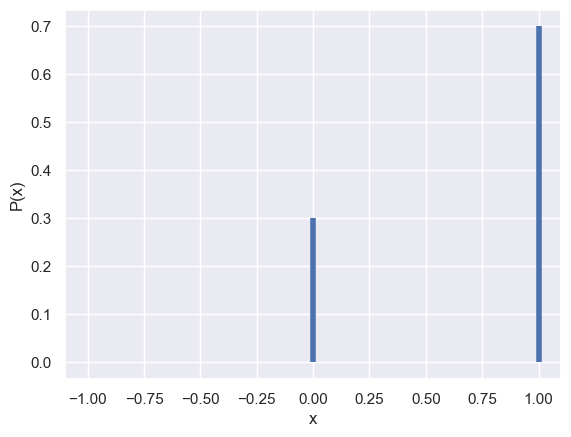

In [5]:
x = np.arange(-1,2,1)
p = .7
f = bernoulli.pmf(x,p)
plot1(x,f)

<a id='binomial'></a>

### Binomial Distribution

The binomial distribution answers the question, given a probabilities $p$ and $1-p$ for outcomes 1 and 2 of a Bernoulli trial, with N trials, what are the odds of seeing $x$ and $N-x$ of outcomes 1 and 2, respectively?

Suppose we have a coin which falls on heads with probability $p \in [0,1]$ and flip it $n$ times. Assuming the tosses are independent of each other we can represent the number of heads as $X$ and probability of getting $x$ heads as $f(X=x)$. Then:

$$\begin{equation}
    f(x) = \begin{cases}
               \binom{n}{x}p^x(1-p)^{n-x}   & \text{for }  x = 0, ..., n\\
                0              & \text{otherwise}
           \end{cases}
\end{equation}$$

We say $X \text{~ Binomial}(n,p)$ where $X$ is the random variable and $n$ and $p$ are the parameters. Adapting our notation, another form is:

$$\begin{equation}
    f(x|n, p) = \begin{cases}
               \binom{n}{x}p^x(1-p)^{n-x}   & \text{for }  x = 0, ..., n\\
                0              & \text{otherwise}
           \end{cases}
\end{equation}$$


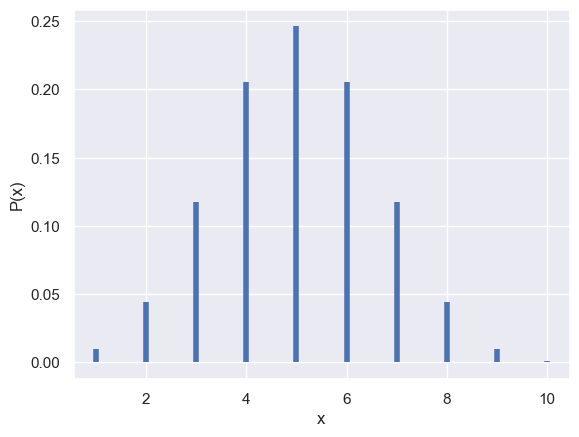

In [6]:
n=10
x = np.arange(1,11,1)
p = .5
f = binom.pmf(x,n,p)
plot1(x,f)

<a id='multinomial'></a>

### Multinomial Distribution

This is a generalization of the binomial distribution, where now, instead of two outcomes, there are $m$ outcomes, with probabilities $p_i$ where $i \in [1,2,... m]$. If there are a total of $N$ trials, then the probability of having the $N$ trials split into a specific set of outcomes $x_i$ is given by:

$$f(x_1, x_2,...,x_m) = \dfrac{m!}{x_1!x_2!...x_m!}p_1^{x_1}p_2^{x_2}...p_m^{x_m} = m!\prod^m_{i=1}\dfrac{p_i^{x_i}}{x_i!}$$

Since it's a multidimensional function, it's difficult to visualize. Written in vector notation with outcome vector $\bf x$ and probability vector $\bf p$ as parameter, both of dimension $m$:

$$f(\mathbf{x} | \mathbf{p}) = m!\prod^m_{i=1}\dfrac{p_i^{x_i}}{x_i!}$$

<a id='geometric'></a>

### Geometric Distribution

For events like flipping a coin till first heads, where $X$ is the number of flips, the probability to meet the condition with $k$ flips is given by:

$$P(X=k) = p(1-p)^{k-1}, \text{     } k\ge1$$

It's also worth noting that:

$$\sum^{\infty}_{k=1}P(X=k) = p\sum^{\infty}_{k=0}(1-p)^k = \dfrac{p}{1-(1-p)} = 1$$ 


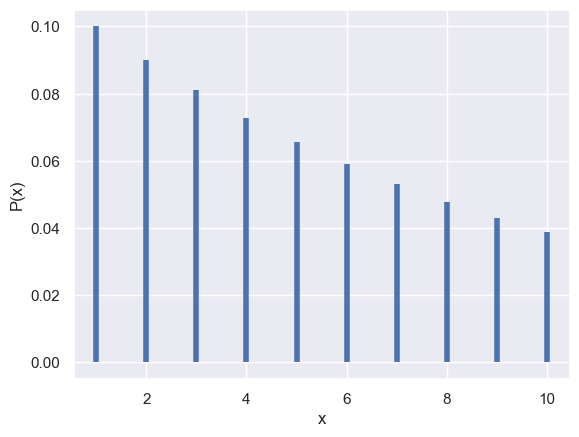

In [7]:
p = .1
f = geom.pmf(x,p)
plot1(x,f)

<a id='hypergeometric'></a>

### The Hypergeometric Distribution

In contrast to the binomial distribution, for draws without replacement, the probability of a successful draw changes with each draw. Given a total of $N$ objects with $K$ success objects and $N-K$ others, the probability of $k$ successes in $n$ draws is given by the total combinations of drawing $k$ out of $K$ successes and $n-k$ out of $N-K$ other objects out of the total ways to draw $n$ out of $N$ objects:

$$ P(X = k|n,N,K) = \dfrac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

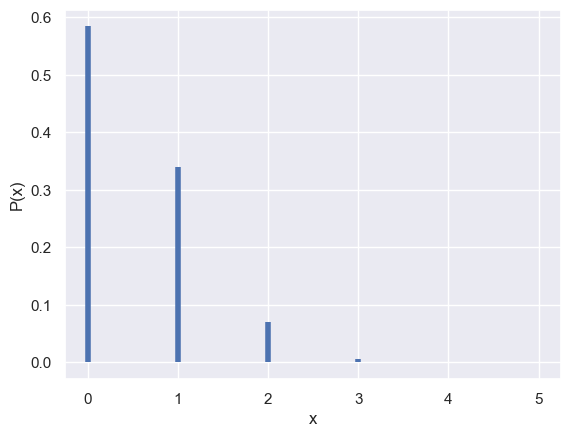

In [8]:
N, K, n = 100, 5, 10
k = np.arange(0,K+1,1)
f = hypergeom.pmf(k, N, n, K)
plot1(k,f)

<a id='poisson'></a>

### The Poisson Distribution

Often used to model rare events, $X \text{~ Poisson }(\lambda)$ is defined by:


$$ f(x) = \exp(-\lambda)\frac{\lambda^x}{x!}$$

It's also worth noting that:

$$\sum^{\infty}_{x=0}f(x) = \exp(-\lambda) \sum^{\infty}_{x=0}\frac{\lambda^x}{x!} = \exp(-\lambda)\exp(\lambda)= 1$$ 


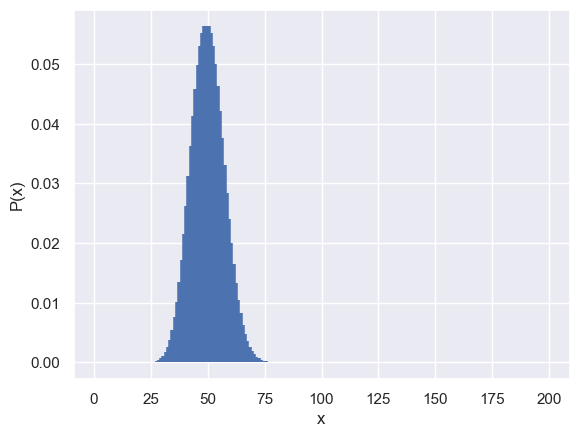

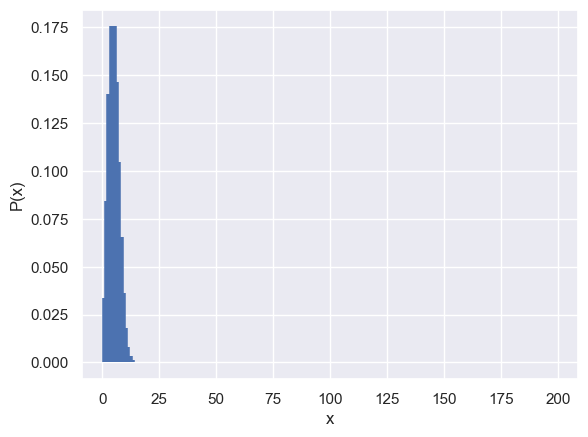

In [9]:
x = np.arange(1,200,1)
k= 50
f = poisson.pmf(x,k)
plot1(x,f)
plot1(x,poisson.pmf(x,5))

## Continuous Distributions:

### Continuous Uniform Distribution


$X$ has a Uniform $(a,b)$ distribution, or $X \text{ ~Uniform }(a,b)$ if:

$$\begin{equation}
    f(x) = \begin{cases}
               \frac{1}{b-a}   & \text{for }  x \in[a,b]\\
                0              & \text{otherwise}
           \end{cases}
\end{equation}$$ 

where $a < b$. The distribution function is:

$$\begin{equation}
    F(x) = \begin{cases}
               0               & x < a\\
              \frac{x-a}{b-a}  & x \in [a,b]\\
              1                & x > b 
              \end{cases}
\end{equation}$$ 

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20100\1199473827.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


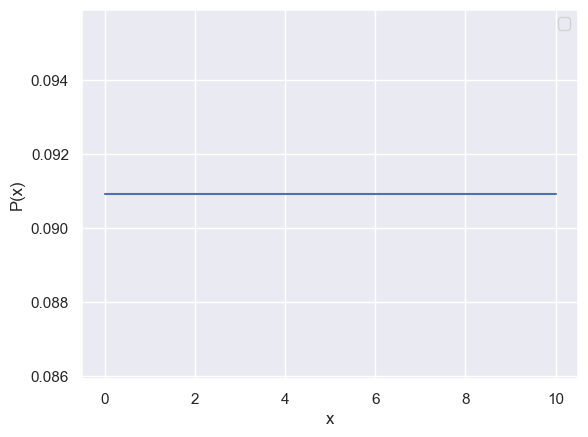

In [10]:
loc = 0
scale = 11
x = np.arange(loc,loc+scale)
f = uniform.pdf(x, loc,scale)
plot2(x,[f], [None])

<a id='normal'></a>


### Normal (Gaussian) Distributions


$X$ has a Normal or Gaussian distribution with parameters $\mu$ and $\sigma$, denoted by $X \text{ ~ }N(\mu, \sigma^2)$ if:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\Big\{-\frac{1}{2\sigma^2}(x-\mu)^2\Big\}, \quad\text{  } x \in \mathbb{R} $$ 

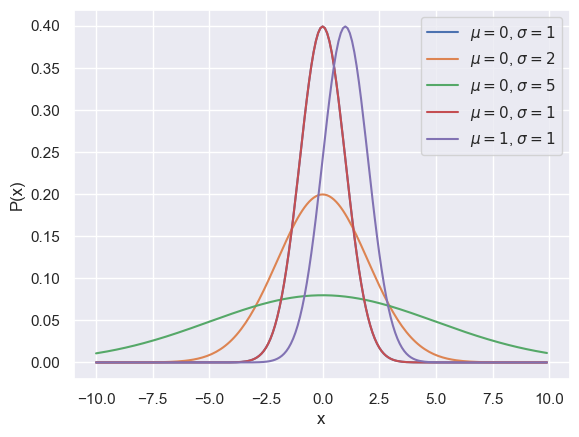

In [11]:
u_ = [0, 0, 0, 0, 1, 2,]
sigma_ = [1,2,5,1,1]
x = np.arange(-10,10,.1)
f = [norm.pdf(x,u,sigma) for u,sigma in zip(u_, sigma_)]
labels = [r'$\mu = %d$, $\sigma = %d$' %(u,sigma) for u, sigma in zip(u_, sigma_)]
plot2(x,f, labels)

<a id='exponential'></a>

### Exponential Distribution

$X$ has an Exponential distribution with parameber $\beta$, noted by $X \text{ ~ Exp}(\beta)$ if:

$$f(x) = \dfrac{1}{\beta}\exp\Big(-\frac{x}{\beta}\Big), \quad \text{     } x >0$$

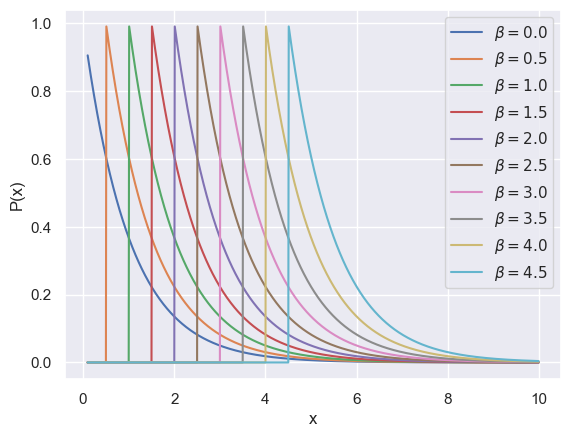

In [12]:
x = np.arange(.1,10,.01)
b = np.arange(0,5, .5)
f = [expon.pdf(x, B) for B in b]
labels = [r'$\beta = %.1f$' % B for B in b]
plot2(x,f,labels)

<a id='gamma'></a>

### Gamma Distribution

For $\alpha > 0$, the Gamma function is defined as:

$$ \Gamma(\alpha) \equiv \int^\infty_0 y^{\alpha -1}\exp(-y)dy$$


$X$ has a Gamma distribution with parameters $\alpha$ and $\beta$, or $X \text{ ~ Gamma}(\alpha, \beta)$, if:


$$ f(x) = \dfrac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}\exp\Big(-\dfrac{x}{\beta}\Big), \quad \text{  } x>0$$



**Special cases**:
- The Exponential distribution is the special case of $\text{Gamma}(1, \beta)$
- The Chi-square distribution is a special case of $\text{Gamma}(p/2, 2)$
    - Using $y = u^2$, $dy = 2udu$, and the result $\int^\infty_{-\infty}\exp({-u^2}) = \sqrt{\pi} $


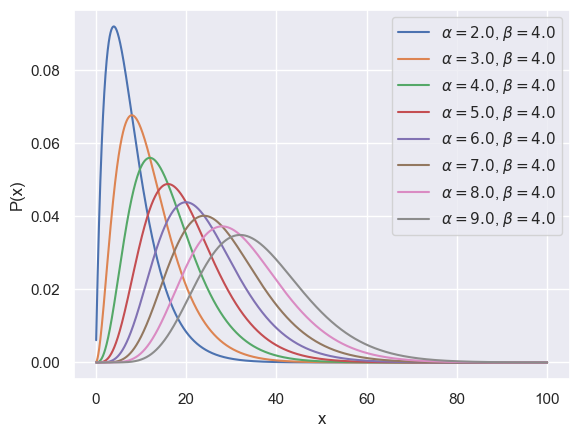

In [13]:
x = np.arange(.1,100,.01)
A = np.arange(2,10,1)# shape
B = np.arange(4,5,1) # scale
f = [gamma.pdf(x,a=a,scale=b) for a in A for b in B]
labels = [r'$\alpha = %.1f$, $\beta = %.1f$' % (a,b) for a in A for b in B]
plot2(x,f, labels)

### Chi Squared Distribution
<a id='chi2'></a>

$X$ has a $\chi^2$ distribution with $p$ degrees of freedom, denoted by $X \text{ ~ }\chi_p^2$ if:

$$f(x) = \dfrac{1}{\Gamma(p/2) 2^{p/2}}x^{(p/2)-1}\exp(-x/2) \text{, } \quad x>0$$

#### Relationship with Normal

This distribution is related to the normal distribution in that if a variable $X$ has a standard normal distribution, its square follows a chi-square distribution with one degree of freedom: $Y = X^2 \text{~} \chi^2_1$. 


Often, we compare how far a value is from an expected one by finding the square of their difference. If the variable converges to a normal distribution, the square of the difference can be considered a chi squared distribution.


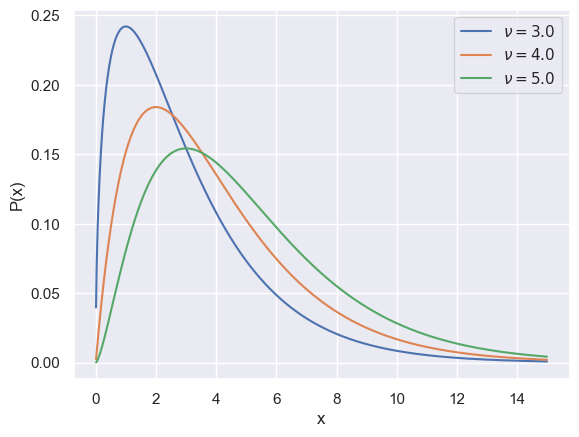

In [14]:
x= np.arange(.01,20,.01)
df_ = np.arange(3,6,1)
x = np.arange(0.01,15,.01)
f = [chi2.pdf(x,df) for df in df_]
labels = [r'$\nu = %.1f$' %df for df in df_]
plot2(x,f, labels)


<a id='beta'></a>
### Beta Distribution

The Beta function is defined as 

$$\text{Beta}(a,b) \equiv \int^\infty_0 t^{a-1}(1-t)^{b-1} = \dfrac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$





See [here](https://en.wikipedia.org/wiki/Beta_function) for the proof of the last equality which involves change of variables in evaluating the product of two Gamma functions.

$X$ has a Beta distribution with parameters $\alpha > 0$ and $\beta > 0$, denoted by $X \text{ ~ Beta} (\alpha, \beta)$ if:

$$f(x) = \dfrac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}, \quad\text{ } 0<x<1$$

Alternatively, we can view the the beta distribution as a distribution over probabilities, $p$ and parameters of number of outcomes $u_1$ and $u_2$:

$$f(p|u_1,u_2) = \dfrac{\Gamma(u_1 + u_2)}{\Gamma(u_1)\Gamma(u_2)}p^{u_1-1}(1-p)^{u_2-1}, \quad\text{ } 0<p<1$$

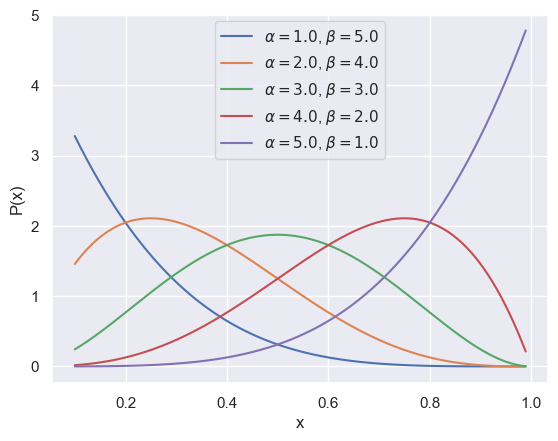

In [15]:
x = np.arange(0.1,.99,.001)
A = np.arange(1,6,1)# shape
#B = np.arange(1,6,1) # scale
B = 6-A
#f = [beta.pdf(x,a=a,b=b) for a in A for b in B]
f = [beta.pdf(x, a=a,b=b) for a,b in zip(A,B)]
#labels = [r'$\alpha = %.1f$, $\beta = %.1f$' % (a,b) for a in A for b in B]
labels = [r'$\alpha = %.1f$, $\beta = %.1f$' % (a,b) for a,b in zip(A,B)]

plot2(x,f, labels)

<a id='dirichlet'></a>
### Dirichlet Distribution

The Dirichlet distribution is an extention of the beta distribution to more dimensions. It's a density over a *K*-dimensional vector, $\mathbf{p}$, with $\sum p_i = 1$. It is defined as:


$$f(\mathbf{p}|\alpha \mathbf{m}) = \dfrac{1}{Z(\alpha \mathbf{m})}\prod_{i=1}^K p^{\alpha m_i - 1}_i \equiv \text{Dirichlet}^{(K)}(\mathbf{p}|\alpha\mathbf{m}), \quad\text{ } 0<p<1$$


where $\mathbf{m}$ is normalized such that $\sum m_i = 1$ and $\alpha > 0$. The normalizing constant is defined as:

$$Z(\alpha\mathbf{m}) = \prod_i \Gamma(\alpha m_i)/\Gamma(\alpha)$$

The parameter $\mathbf{m}$ is the mean of the probability distribution while the constant $\alpha$ 

### t and Cauchy Distribution
<a id='t'></a>
<a id='cauchy'></a>

$X$ has a $t$ distribution with $v$ degrees of freedom, denoted by $X \text{ ~ }t_v$ - if:

$$f(x) = \dfrac{\Gamma\Big(\dfrac{v+1}{2}\Big)}{\Gamma \Big(\dfrac{v}{2}\Big)}\dfrac{1}{\sqrt{\nu \pi}} \dfrac{1}{\Big(1+\dfrac{x^2}{v}\Big)^{(v+1)/2}}$$


The Cauchy is a special case of the $t$ distribution with $v = 1$. The density is:

$$f(x) = \dfrac{1}{\pi (1+x^2)}$$


We can see that it's a probability density since it's never negative, and it integrates to unity:

$$\int^\infty_{-\infty} f(x)dx = \dfrac{1}{\pi}\int^\infty_{-\infty}\dfrac{1}{\pi (1+x^2)} = \dfrac{1}{\pi}\int^\infty_{-\infty}\dfrac{d\arctan}{dx} = \dfrac{1}{\pi}[\arctan(\infty) - \arctan(-\infty)] = \dfrac{1}{\pi}\Big[\dfrac{\pi}{2}-\Big(-\dfrac{\pi}{2}\Big)\Big]=1$$



While the mean and variance do not exist for the Cauchy distribution, it often is seen with location parameter $\mu$ and scale parameter $\sigma$ by the transformation $x \rightarrow \dfrac{x-\mu}{\sigma}$, and $dx \rightarrow \frac{1}{\sigma}$ to obtain the modified pdf:

$$f(x) = \dfrac{1}{\sigma\pi \Big(1+\big[\frac{x-\mu}{\sigma}\big]^2\Big)}$$


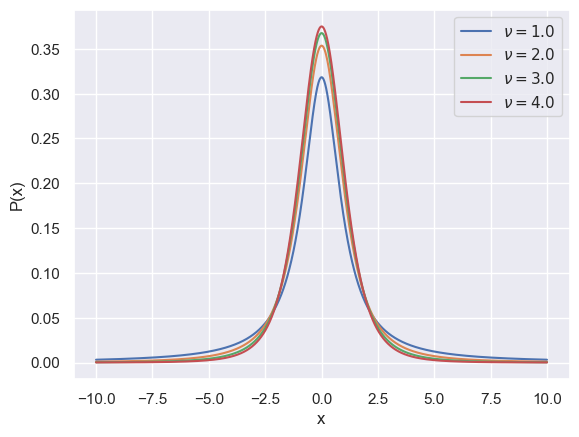

In [16]:
df_ = np.arange(1,5,1)
x = np.arange(-10,10,.01)
f = [t.pdf(x,df) for df in df_]
labels = [r'$\nu = %.1f$' %df for df in df_]
plot2(x,f, labels)


#### Student-t as a Mixture of Normals

Let $X|W$ ~ $N(0,W)$ and let $W ~ Gamma(\nu/2, \nu/2)$. Then the distribution of $X$ is:

$$\begin{align} 
f_X(x) &= \int^{\infty}_0 \\
    &\propto \frac{1}{\sqrt{w}}\exp\big(-\frac{x^2}{2w}\big)\\
\end{align}$$

<a id='pareto'></a>

### Pareto Distribution


$$\begin{equation}
    f(x) = \begin{cases}
               \dfrac{\alpha x_m^\alpha}{x^{\alpha+1}}   & \text{for }  x \ge x_m\\
                0              & \text{for } x < x_m
           \end{cases}
\end{equation}$$ 


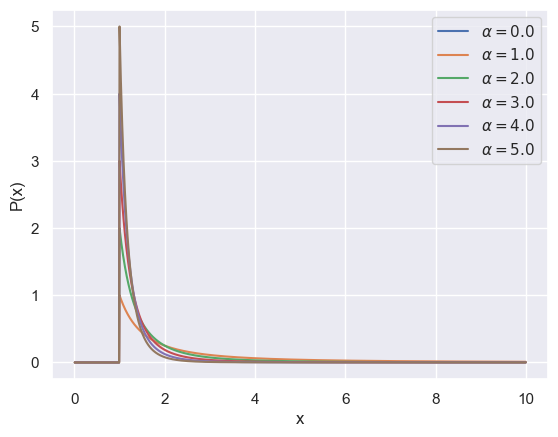

In [17]:
import numpy as np
x = np.arange(0.01,10,.01)
a_ = np.arange(0,6,1)
f = [pareto.pdf(x,a, scale=1) for a in a_]
labels = [r'$\alpha = %.1f$' %a for a in a_]
plot2(x,f, labels)

<a id='lognormal'></a>
### Log-normal  Distribution


$X$ has a Log-normal distribution with parameters $\mu$ and $\sigma$, denoted by $ X \sim \text{Lognormal}(\mu, \sigma)$ if $\ln X \sim N(\mu, \sigma^2)$. This results in a probability distribution function of:

$$f(x) = \frac{1}{x\sigma \sqrt{2 \pi}} \exp\Big\{-\frac{1}{2\sigma^2}(\ln x-\mu)^2\Big\}, \quad\text{  } x \in \mathbb{R} $$ 

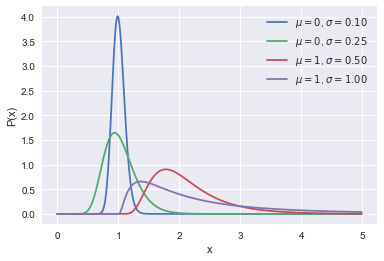

In [6]:
u_ = [0,0,1,1]
sigma_ = [.1,.25, .5, 1]
x = np.arange(0,5,.01)
f = [lognorm.pdf(x,loc=u,s=sigma) for u,sigma in zip(u_, sigma_)]
labels = [r'$\mu = %d$, $\sigma = %.2f$' %(u,sigma) for u, sigma in zip(u_, sigma_)]
plot2(x,f, labels)

## Means and Variance of Common Distributions

For convenience $\overline{X} = \dfrac{\sum^n_{i=1}X_i}{n}$ and $S^2 = \dfrac{\sum^n_{i=1} (X_i-\overline{X})^2}{n}$. 
<a id='bottom'></a>

<table cellspacing="25">
  <tr>
    <th>Distribution</th>
    <th>Mean</th>
    <th>Variance</th>
    <th>Maximum Likelihood Estimator</th>
    <th>Moment Generating Function</th>
  </tr>
  <tr>
    <td>Point mass at a</td>
    <td>a</td>
    <td>0</td>
    <td>N\A</td>
    <td>N\A</td>  
  </tr>
  <tr>
   <td>Bernoulli (p)</td>
   <td>p</td>
   <td>p(1-p)</td>
   <td>$\hat{p} =\overline{X}$</td>
   <td>$1 + pe^t - p$</td>
  </tr>
  
  <tr>
   <td>Binomial (n, p)</td>
   <td>np</td>
   <td>np(1-p)</td> 
   <td>$\hat{p} =\overline{X}$</td>
   <td>$(1 + pe^t - p)^n$</td>
  </tr>
  
  <tr>
   <td>Geometric</td>
   <td>1/p</td>
   <td>$\dfrac{(1-p)}{p^2}$</td>   
   <td>$\hat{p} =\dfrac{1}{\overline{X}}$</td>
      <td>N/a</td>
  </tr>
  <tr>
   <td>Hypergeometric</td>
   <td>$n\dfrac{K}{N}$</td>
   <td>$n\dfrac{K}{N}\dfrac{(N-K)}{N}\dfrac{N-n}{N-1}$</td>
      <td></td>
      <td></td>
     </tr>
  
  
  <tr>
   <td>Poisson $(\lambda)$</td>
   <td>$\lambda$</td>
   <td>$\lambda$</td> 
   <td>$\hat{\lambda} = \overline{X}$</td>
   <td>$\exp\Big(\lambda[e^t-1]\Big)$</td> 
    
  </tr>
  
  <tr>
   <td>Uniform $(a, b)$</td>
   <td>$$\dfrac{(a+b)}{2}$$ </td>
   <td>$$\dfrac{(b-a)^2}{12}$$</td>   
   <td>$$\begin{align} \text{for U}&(0,\theta) \\ \hat{\theta} &= \max\{X_i\}\end{align}$$</td>
  </tr>
  
  <tr>
   <td>Normal $(\mu, \sigma^2)$</td>
   <td>$\mu$</td>
   <td>$\sigma^2$</td> 
   <td>$$\begin{align}\hat{p}&=\overline{X}\\
   \quad \hat{\sigma} &=S\end{align}$$</td>
   <td>$\exp\Big(\mu t + \frac{\sigma^2 t^2}{2}\Big)$</td>
  </tr>

  <tr>
   <td>Exponential $(\beta)$</td>
   <td>$\beta$</td>
   <td>$\beta^2$</td>   
   <td>$$\hat{\beta}= \overline{X}$$</td>
   <td>$$\dfrac{1}{(1-\beta t)}$$</td>
  </tr>

<tr>
   <td>Gamma $(\alpha, \beta)$</td>
   <td>$\alpha \beta$</td>
   <td>$\alpha \beta^2$</td>
   <td>$\hat{\beta}= \dfrac{\overline{X}}{\alpha}$</td>
   <td>$\dfrac{1}{(1-\beta t)^\alpha}$</td>
  </tr>

<tr>
   <td>Beta $(\alpha, \beta)$</td>
   <td>$\dfrac{\alpha}{(\alpha + \beta)}$</td>
   <td>$\dfrac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$</td>   
  </tr>

<tr>
   <td>$t_{\nu}$</td>
   <td>0 if $(\nu > 1)$</td>
   <td>$\dfrac{\nu}{\nu - 2}$</td>   
  </tr>

<tr>
   <td>$\chi^2_p$</td>
   <td>p</td>
   <td>2p</td>
   <td></td>
   <td>$\dfrac{1}{(1-2 t)^{p/2}}$</td>
  </tr>
<tr>
   <td>Pareto</td>
   <td>$\dfrac{\alpha x^\alpha_m}{\alpha-1}$</td>
   <td>$\dfrac{\alpha x^\alpha_m}{(\alpha-2)(\alpha-1)^2}$</td>
   <td>$$\begin{align}\hat{x}_m &= x_{(1)}\\
          \hat{\alpha}&= \dfrac{1}{\frac{1}{n}\sum^n_{i=1}{\ln x_i}- \ln(x_1)} \end{align}$$</td>   
  
  </tr>

<tr>
   <td>Multinomial $(n, \mathbf{p})$</td>
   <td>$n\mathbf{p}$</td>
   <td> $$\begin{align}M_{ii} &= np_i(1-p_i)\\
          M_{ij}&= -np_i p_j \end{align}$$</td>
   <td>$\hat{\mathbf{p}} =\overline{X}$</td>
  </tr>

<tr>
   <td>Multivariate Normal $(\mu, \Sigma)$</td>
   <td>$\mu$</td>
   <td> Matrix $\Sigma_{ij} = \text{Cov}(X_i, X_j)$ </td>   
  </tr>
</table>
 